In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge_IIoTset__DatasetFL.pdf
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Readme.txt
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/MITM (ARP spoofing + DNS) Attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/XSS_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_UD

# Experiment on massive datasets with multi-label (14 labels) classification
Edge-IIoT dataset is a comprehensive cyber security dataset for IoT and IIoT applications. The dataset supports machine learning-based intrusion detection systems in centralized and federated learning modes. It comprises seven layers with emerging technologies suitable for IoT and IIoT applications. The dataset includes data from over 10 types of IoT devices and analyses 14 attacks related to IoT and IIoT connectivity protocols, categorized into five threats.
<br>
For fast computation, we created a small data sample for this demo.
<br>
 [reference] M. A. Ferrag, O. Friha, D. Hamouda, L. Maglaras and H. Janicke, "Edge-IIoTset: A new comprehensive realistic cyber security dataset of IoT and IIoT applications for centralized and federated learning", IEEE Access, vol. 10, pp. 40281-40306, 2022.


In [34]:
import pandas as pd
import numpy as np

df = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)


In [35]:
def conditional_sample(group):
    if len(group) < 3600:
        return group
    else:
        return group.sample(n=3600)

#df = df.groupby('Attack_type', group_keys=False).apply(conditional_sample)

In [71]:
#df.to_csv("iiot_sample.csv")
df = pd.read_csv('/kaggle/working/iiot_sample.csv')

/tmp/ipykernel_42/1107642847.py:2: DtypeWarning: Columns (7,12,14,15,16,17,18,32,33,35,40,46,52,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/working/iiot_sample.csv')


Here we removed irrelevant column and check the data.

In [72]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 18:24:50.058960000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Backdoor
1,2021 20:57:13.253893000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Backdoor
2,2021 20:52:31.163131000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Backdoor
3,2021 20:59:03.605704000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Backdoor
4,2021 20:23:21.555043000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Backdoor


In [38]:
from sklearn.preprocessing import LabelEncoder

def encode_object_columns(df):
    # Get column names with data type as object
    object_cols = df.select_dtypes(include="object").columns.tolist()

    # Apply LabelEncoder on each object column
    for col in object_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    return df

encode_object_columns(df)
df.drop("frame.time", axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

As there are numerous features, we utilised <b>FeatureSelector</b> class for feature selection.

In [39]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class FeatureSelector:
    """
    To use this class, instantiate it with the desired method ('elastic_net' or 'pca') and the corresponding alpha value for its parameter.
    After pre-processing, call the print_report method to see the list of selected features or the total explained ratio,
    depending on the chosen method.
    """
    def __init__(self, method='elastic_net', params=None):
        self.method = method
        self.params = params
        self.selected_features = None
        self.explained_ratio = None
        self.column_names = X.columns.tolist()

        if params is not None:
            if 'alpha' in params:
                self.alpha = params['alpha']
            if 'components' in params:
                self.components = params['components']

        if not hasattr(self, 'alpha'):  # Set default values if not provided
            self.alpha = 0.1
        if not hasattr(self, 'components'):
            self.components = 2

    def fit_transform(self, X, y=None):
        if self.method == 'elastic_net':
            return self.feature_selection(X, y, 'elastic_net')
        elif self.method == 'pca':
            return self.feature_selection(X, y=None, method='pca')
        else:
            raise ValueError("Invalid method. Choose 'elastic_net' or 'pca'.")

    def feature_selection(self, X, y=None, method='elastic_net'):
        if method == 'elastic_net':
            enet = ElasticNet(alpha=self.alpha)
            enet.fit(X, y)
            self.selected_features = np.nonzero(enet.coef_)[0]
            important_features = np.array(X)[:, self.selected_features]
        elif method == 'pca':
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            pca = PCA(n_components=self.components)
            X_transformed = pca.fit_transform(X_scaled)
            self.explained_ratio = pca.explained_variance_ratio_.sum()
            important_features = X_transformed
        else:
            raise ValueError("Invalid method. Choose 'elastic_net' or 'pca'.")

        self.print_report(method)  # Call the print_report method with 'method'
        return important_features

    def print_report(self, method):
        if method == 'elastic_net':
            column_names = self.column_names
            selected_column_names = [column_names[idx] for idx in self.selected_features]
            print("Selected Features (Elastic Net):", selected_column_names)
        elif method == 'pca':
            print("Total Explained Ratio (PCA):", self.explained_ratio)
            if self.explained_ratio < 0.95:
                print("Warning: The total explained data portion is less than 95%; try increasing the value of components.")
        else:
            raise ValueError("Invalid method. Choose 'elastic_net' or 'pca'.")

X, y = df.iloc[:,:60],df.iloc[:,-1:]
featureselect = FeatureSelector(method='pca', params={"components":41})
X_selected = featureselect.fit_transform(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

Total Explained Ratio (PCA): 0.9984133448598288


Then, we normalised the data and prepare datasets for model training.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_selected)

In [41]:
import sys
sys.path.insert(1, '/kaggle/input/models/')
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Recall, Precision, AUC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.33,random_state=42)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [42]:
X.shape[1]

41

In [43]:
classes=len(np.unique(y))

In [44]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [45]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# DeepCNN

In [46]:
import sys
sys.path.insert(1, '/kaggle/input/models/')
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Recall, Precision, AUC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [47]:
from DeepCNN import DeepCNN
model = DeepCNN(input_shape=(X_train.shape[1],1), blocks=3, units=128, classes=classes)
# Train the model
hist_train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

The plot displays the accuracy optimisation during the training process.

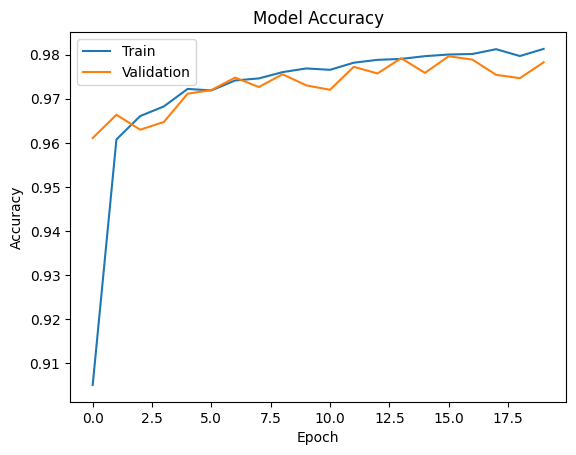

In [48]:
model.draw_plot()

The overall evaluation matrics is calculated based on the testing set.

In [49]:
model.test(X_test, y_test)

498/498 [==============================] - 2s 4ms/step - loss: 0.0640 - accuracy: 0.9782 - recall_4: 0.9995 - precision_4: 0.4007 - auc: 0.9953


[0.06399256736040115,
 0.9782485961914062,
 0.9994970560073853,
 0.40068045258522034,
 0.9953432083129883]


The classification report is printed based on the testing set.

In [50]:
model.print_classification_report(X_test, y_test,['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM','Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS'])

498/498 [==============================] - 1s 2ms/step
                       precision    recall  f1-score   support

             Backdoor       1.00      0.96      0.98      1188
            DDoS_HTTP       0.99      0.99      0.99      1188
            DDoS_ICMP       1.00      0.99      1.00      1188
             DDoS_TCP       0.98      1.00      0.99      1188
             DDoS_UDP       1.00      1.00      1.00      1188
       Fingerprinting       0.97      0.76      0.85       331
                 MITM       0.99      1.00      0.99       132
               Normal       1.00      1.00      1.00      1188
             Password       0.99      0.95      0.97      1188
        Port_Scanning       0.97      0.93      0.95      1188
           Ransomware       0.88      1.00      0.93      1188
        SQL_injection       0.98      1.00      0.99      1188
            Uploading       0.97      0.99      0.98      1188
Vulnerability_scanner       0.99      0.98      0.99      1188

# Test hybrid CNN-GRU

In [51]:
from cnn_gru_hybridmodel import Hybrid_CNN_GRU
hybrid_classifier = Hybrid_CNN_GRU(input_shape=(X_train.shape[1],1), units=128, classes=classes)

In [52]:
hybrid_classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

The plot displays the accuracy optimisation during the training process.


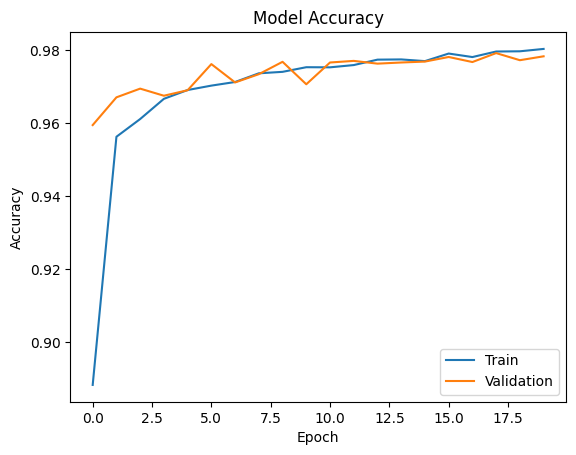

In [53]:
hybrid_classifier.draw_plot()

The overall evaluation matrics is calculated based on the testing set.

In [54]:
hybrid_classifier.test(X_test, y_test)

498/498 [==============================] - 3s 5ms/step - loss: 0.0584 - accuracy: 0.9783 - recall_5: 0.9730 - precision_5: 0.9864 - auc: 0.9993


[0.05838217958807945,
 0.9783114194869995,
 0.9729678630828857,
 0.9863616228103638,
 0.999334454536438]

The classification report is printed based on the testing set.


In [55]:
hybrid_classifier.print_classification_report(X_test, y_test,['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM','Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS'])

498/498 [==============================] - 3s 4ms/step
                       precision    recall  f1-score   support

             Backdoor       1.00      0.97      0.98      1188
            DDoS_HTTP       0.98      0.99      0.98      1188
            DDoS_ICMP       1.00      0.99      1.00      1188
             DDoS_TCP       0.99      0.99      0.99      1188
             DDoS_UDP       1.00      1.00      1.00      1188
       Fingerprinting       0.95      0.78      0.85       331
                 MITM       0.99      1.00      0.99       132
               Normal       1.00      1.00      1.00      1188
             Password       0.98      0.96      0.97      1188
        Port_Scanning       0.95      0.94      0.95      1188
           Ransomware       0.90      0.98      0.94      1188
        SQL_injection       0.97      1.00      0.99      1188
            Uploading       0.98      0.98      0.98      1188
Vulnerability_scanner       0.99      0.97      0.98      1188

# Test Residual

In [56]:
from cnn_variation import residual_block, hybrid_variation
hybrid_ = hybrid_variation(input_shape=(41,1), units=128, classes=classes, block="residual", loop_number=2)

In [57]:
hybrid_.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

The plot displays the accuracy optimisation during the training process.

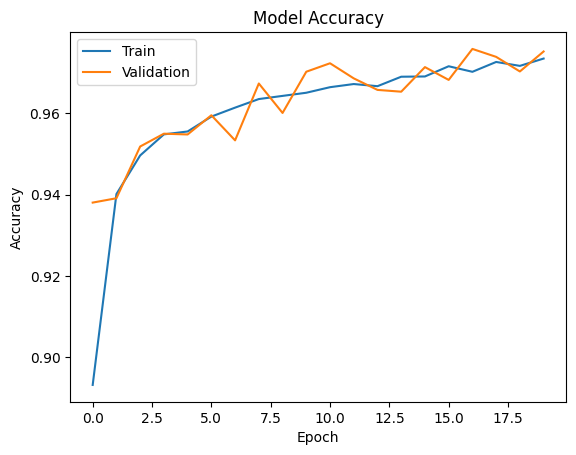

In [58]:
hybrid_.draw_plot()

The overall evaluation matrics is calculated based on the testing set.

In [59]:
hybrid_.test(X_test, y_test)

498/498 [==============================] - 2s 4ms/step - loss: 0.0795 - accuracy: 0.9751 - recall_6: 0.9722 - precision_6: 0.9789 - auc: 0.9988


[0.07951092720031738,
 0.9751052856445312,
 0.9721506237983704,
 0.978920042514801,
 0.9987616539001465]

The classification report is printed based on the testing set.

In [60]:
hybrid_.print_classification_report(X_test, y_test,['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM','Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS'])

498/498 [==============================] - 1s 2ms/step
                       precision    recall  f1-score   support

             Backdoor       1.00      0.95      0.98      1188
            DDoS_HTTP       0.99      0.98      0.98      1188
            DDoS_ICMP       1.00      0.99      1.00      1188
             DDoS_TCP       0.98      0.99      0.99      1188
             DDoS_UDP       1.00      1.00      1.00      1188
       Fingerprinting       0.96      0.74      0.84       331
                 MITM       1.00      1.00      1.00       132
               Normal       1.00      1.00      1.00      1188
             Password       1.00      0.94      0.96      1188
        Port_Scanning       0.93      0.95      0.94      1188
           Ransomware       0.89      0.97      0.93      1188
        SQL_injection       0.98      0.99      0.99      1188
            Uploading       0.95      1.00      0.98      1188
Vulnerability_scanner       1.00      0.97      0.98      1188

# test Xception

In [66]:
xcept = hybrid_variation(input_shape=(41,1), units=128, classes=classes, block="Xception", loop_number=2)

In [67]:
xcept.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

The plot displays the accuracy optimisation during the training process.


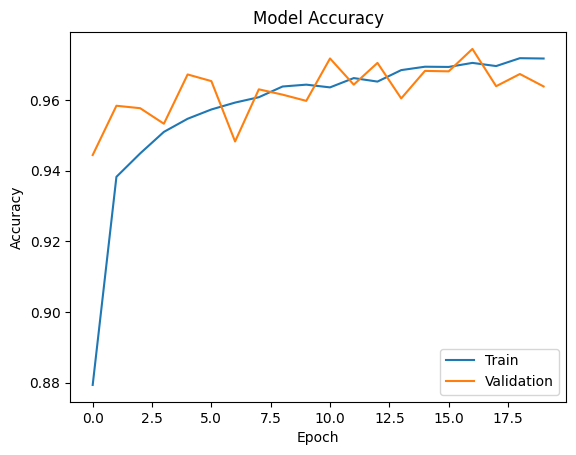

In [68]:
xcept.draw_plot()

The overall evaluation matrics is calculated based on the testing set.


In [69]:
xcept.test(X_test, y_test)

498/498 [==============================] - 2s 5ms/step - loss: 0.1094 - accuracy: 0.9639 - recall_8: 0.9610 - precision_8: 0.9743 - auc: 0.9983


[0.1093820258975029,
 0.9638524055480957,
 0.9610234498977661,
 0.9743148684501648,
 0.9982663989067078]

The classification report is printed based on the testing set.

In [70]:
xcept.print_classification_report(X_test, y_test,['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM','Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS'])

498/498 [==============================] - 1s 2ms/step
                       precision    recall  f1-score   support

             Backdoor       0.89      0.97      0.93      1188
            DDoS_HTTP       0.96      1.00      0.98      1188
            DDoS_ICMP       1.00      0.99      1.00      1188
             DDoS_TCP       0.99      0.99      0.99      1188
             DDoS_UDP       1.00      1.00      1.00      1188
       Fingerprinting       0.96      0.76      0.85       331
                 MITM       1.00      1.00      1.00       132
               Normal       1.00      1.00      1.00      1188
             Password       0.94      0.96      0.95      1188
        Port_Scanning       0.90      0.96      0.93      1188
           Ransomware       0.99      0.88      0.93      1188
        SQL_injection       0.96      1.00      0.98      1188
            Uploading       1.00      0.94      0.97      1188
Vulnerability_scanner       0.93      0.97      0.95      1188